# New York City Taxi Fare Prediction

![](https://i.imgur.com/ecwUY8F.png)

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers. 

This dataset is taken from a [Kaggle competition](ttps://www.kaggle.com/c/new-york-city-taxi-fare-prediction) organized by Google Cloud. 



We will go with this approach

![](https://i.imgur.com/kKdAALX.png)


## 1. Download the Dataset

### Install Required Libraries

In [229]:
import pandas as pd
import opendatasets as od
import random
import numpy as np

### Download Data from Kaggle

In [230]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

In [231]:
data = od.download(dataset_url)

Skipping, found downloaded files in ".\new-york-city-taxi-fare-prediction" (use force=True to force download)


In [232]:
data_dir = './new-york-city-taxi-fare-prediction'

### View Dataset Files

Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size
- Training data has 5.5 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
    - `key` (a unique identifier)
    - `fare_amount` (target column)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
- The test set has all columns except the target column `fare_amount`.
- The submission file should contain the `key` and `fare_amount` for each test sample.



### Loading Training Set

In [233]:
# %%time
sample_frac = 0.1

selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv", 
                 usecols=selected_cols, 
                 dtype=dtypes, 
                 parse_dates=['pickup_datetime'], 
                 skiprows=skip_row)

### Load Test Set

For the test set, we'll simply provide the data types.

In [234]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [235]:
df = df.sample(frac=0.1, random_state=42)

## 2. Explore the Dataset

### Training Set

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554260 entries, 46408 to 3388239
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        554260 non-null  float32            
 1   pickup_datetime    554260 non-null  datetime64[ns, UTC]
 2   pickup_longitude   554260 non-null  float32            
 3   pickup_latitude    554260 non-null  float32            
 4   dropoff_longitude  554254 non-null  float32            
 5   dropoff_latitude   554254 non-null  float64            
 6   passenger_count    554260 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 23.3 MB


In [237]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,554260.000000,554260.000000,554260.000000,554254.000000,554254.000000,554260.000000
mean,11.328062,-72.502403,39.901344,-72.499763,39.899464,1.684652
std,9.738989,13.893068,9.886724,13.115360,10.057526,1.308522
min,-96.000000,-3320.372803,-3415.400635,-2635.312012,-3483.855258,0.000000
25%,6.000000,-73.992073,40.734959,-73.991463,40.733923,1.000000
50%,8.500000,-73.981812,40.752728,-73.980156,40.753106,1.000000
75%,12.500000,-73.967033,40.767143,-73.963684,40.768066,2.000000
max,467.500000,3045.190918,1610.814087,3045.190918,1610.814082,6.000000


In [238]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:52:23+0000', tz='UTC'))

In [239]:
df.dropna(inplace=True)


### Test Set

In [240]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [241]:
test_df.describe()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [242]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()


(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

In [243]:
test_df.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## 3. Prepare Dataset for Training


### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
len(train_df),len(val_df)

(443403, 110851)

In [246]:
train_df = train_df.dropna()
val_df = val_df.dropna()

In [247]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [248]:
for columns in df.columns:
    print(columns, ":",df[columns].dtype)

fare_amount : float32
pickup_datetime : datetime64[ns, UTC]
pickup_longitude : float32
pickup_latitude : float32
dropoff_longitude : float32
dropoff_latitude : float64
passenger_count : float32


## 3. Feature Engineering


- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add distance from landmarks


### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour



In [249]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [250]:
add_dateparts(train_df, 'pickup_datetime')

In [251]:
add_dateparts(val_df, 'pickup_datetime')

In [252]:
add_dateparts(test_df, 'pickup_datetime')

In [253]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
4321120,10.000000,2015-03-27 23:21:03+00:00,-74.000092,40.761570,-73.970726,40.764744,1.0,2015,3,27,4,23
2428681,7.700000,2011-08-31 22:41:53+00:00,-74.002029,40.750774,-73.980881,40.781599,2.0,2011,8,31,2,22
4728450,8.500000,2012-02-23 19:12:13+00:00,-74.001068,40.731571,-73.992050,40.714999,1.0,2012,2,23,3,19
4029692,7.000000,2014-05-02 08:11:00+00:00,-74.014168,40.709446,-74.005089,40.719837,1.0,2014,5,2,4,8
1736770,16.500000,2009-06-02 22:02:17+00:00,-74.001976,40.728073,-73.967636,40.787679,1.0,2009,6,2,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...
2236496,5.300000,2011-05-16 11:52:00+00:00,-73.980087,40.743015,-73.973305,40.751452,2.0,2011,5,16,0,11
1694616,8.000000,2012-11-25 03:19:00+00:00,-74.001968,40.740532,-73.979012,40.741202,5.0,2012,11,25,6,3
392666,17.299999,2012-01-25 11:54:08+00:00,-74.006813,40.706230,-73.989929,40.750996,1.0,2012,1,25,2,11
3416048,4.500000,2009-01-27 10:00:20+00:00,-73.977493,40.746525,-73.974724,40.752158,1.0,2009,1,27,1,10


### Add Distance Between Pickup and Drop

In [254]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [255]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [256]:
%%time
add_trip_distance(train_df)

CPU times: total: 15.6 ms
Wall time: 55.9 ms


In [257]:
add_trip_distance(val_df)

In [258]:
add_trip_distance(test_df)

In [259]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
2934168,7.7,2012-04-21 16:32:52+00:00,-73.978333,40.761818,-73.990860,40.745695,2.0,2012,4,21,5,16,2.078912
1375957,15.7,2009-11-11 03:51:11+00:00,-73.995956,40.767216,-73.940964,40.829091,1.0,2009,11,11,2,3,8.287065
313012,7.7,2012-06-30 17:27:58+00:00,-73.987411,40.749859,-73.987030,40.726653,2.0,2012,6,30,5,17,2.578858
4006104,16.5,2014-01-04 21:34:41+00:00,-74.005905,40.709362,-73.940994,40.696330,1.0,2014,1,4,5,21,5.657132
4449443,8.9,2012-06-28 21:38:00+00:00,-73.988731,40.758766,-73.969803,40.787967,1.0,2012,6,28,3,21,3.614928


### Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location. 

In [260]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [261]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])


In [262]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: total: 156 ms
Wall time: 221 ms


In [263]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
951297,16.5,2010-05-25 22:19:25+00:00,-74.012131,40.707150,-73.974693,40.756593,1.0,2010,5,25,1,22,6.334598,20.939730,8.769762,18.405452,2.712600,5.717485
3084343,5.7,2011-11-14 01:10:48+00:00,-73.983391,40.761215,-73.981956,40.771267,1.0,2011,11,14,0,1,1.123358,22.438947,9.106633,18.586365,1.818782,6.930871
2491068,28.9,2012-02-24 21:54:00+00:00,-73.862968,40.768826,-73.970596,40.788587,1.0,2012,2,24,4,21,9.318745,23.038446,8.230696,20.396305,1.195374,9.069298
860945,6.9,2010-07-22 20:57:00+00:00,-74.003502,40.725201,-74.010635,40.709497,2.0,2010,7,22,3,20,1.845566,21.011926,13.727005,13.983470,8.734208,0.350273
5086343,9.3,2009-06-28 03:12:01+00:00,-73.987862,40.765297,-73.998985,40.728214,2.0,2009,6,28,6,3,4.226042,20.970198,11.830954,15.398006,6.436416,1.963574


### Remove Outliers and Invalid Data

There seems to be some invalide data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

In [264]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,443403.000000,443403.000000,443403.000000,443403.000000,443403.000000,443403.000000,443403.000000,443403.000000,443403.000000,443403.00000,443403.000000,443403.000000,443403.000000,443403.000000,443403.000000,443403.000000,443403.000000
mean,11.329108,-72.507820,39.902088,-72.506096,39.899097,1.686121,2011.739900,6.266996,15.700025,3.04292,13.492365,20.149734,192.655011,181.873881,190.924374,176.926966,178.408513
std,9.731365,14.066110,10.582174,13.562894,10.782491,1.309458,1.857708,3.438313,8.685712,1.94849,6.511993,373.427838,1222.991206,1226.041307,1227.870185,1227.751223,1227.847796
min,-96.000000,-3320.372803,-3415.400635,-2635.312012,-3483.855258,0.000000,2009.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.332365,0.196104,0.246340,0.037383,0.005160
25%,6.000000,-73.992073,40.734997,-73.991470,40.733923,1.000000,2010.000000,3.000000,8.000000,1.00000,9.000000,1.208694,20.537541,8.345685,16.494572,2.172124,3.630888
50%,8.500000,-73.981827,40.752743,-73.980156,40.753100,1.000000,2012.000000,6.000000,16.000000,3.00000,14.000000,2.114037,21.202149,9.578120,18.019128,3.821448,5.561476
75%,12.500000,-73.967087,40.767162,-73.963684,40.768082,2.000000,2013.000000,9.000000,23.000000,5.00000,19.000000,3.872398,21.947517,11.134841,19.955493,6.077785,7.818409
max,467.500000,3045.190918,1610.814087,3045.190918,1610.814082,6.000000,2015.000000,12.000000,31.000000,6.00000,23.000000,13457.196344,15349.637584,15358.183677,15336.584174,15354.458571,15346.077443


In [265]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433217,20.916707,9.675209,18.546655,4.512975,6.037621
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969883,3.303942,3.295656,4.035818,4.018438,4.252537
min,-74.252190,40.573143,-74.263245,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000009,0.402057,0.285510,0.284706,0.085728,0.040386
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297281,20.513366,8.311562,16.520468,2.126326,3.669914
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215669,21.181394,9.477792,18.024364,3.698360,5.541418
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.042928,21.909781,10.965471,19.880521,5.922760,7.757408
max,-72.986534,41.709557,-72.990967,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933359,134.497657,126.062486,149.400789,130.347048,138.619454


We'll use the following ranges:

- `fare_amount`: \$1 to \$500
- `longitudes`: -75 to -72
- `latitudes`: 40 to 42
- `passenger_count`: 1 to 6


In [266]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [267]:
train_df = remove_outliers(train_df)

In [268]:
val_df = remove_outliers(val_df)

### Scaling and One-Hot Encoding

**Exercise**: Try scaling numeric columns to the `(0,1)` range and encoding categorical columns using a one-hot encoder.

We won't do this because we'll be training tree-based models which are generally able to do a good job even without the above.

In [307]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [308]:
target_col = 'fare_amount'

In [309]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [310]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [311]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
4321120,10.000000,2015-03-27 23:21:03+00:00,-74.000092,40.761570,-73.970726,40.764744,1.0,2015,3,27,4,23,2.497053,21.248681,8.251297,19.089546,1.747307,6.667664
2428681,7.700000,2011-08-31 22:41:53+00:00,-74.002029,40.750774,-73.980881,40.781599,2.0,2011,8,31,2,22,3.860271,23.126381,9.008725,19.249675,1.507346,8.047386
4728450,8.500000,2012-02-23 19:12:13+00:00,-74.001068,40.731571,-73.992050,40.714999,1.0,2012,2,23,3,19,1.992091,19.803436,12.086615,15.629889,7.557325,1.527304
4029692,7.000000,2014-05-02 08:11:00+00:00,-74.014168,40.709446,-74.005089,40.719837,1.0,2014,5,2,4,8,1.385096,21.025650,12.727696,14.664673,7.499492,0.900695
1736770,16.500000,2009-06-02 22:02:17+00:00,-74.001976,40.728073,-73.967636,40.787679,1.0,2009,6,2,1,22,7.227028,22.791774,7.969323,20.552714,0.992737,9.070182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236496,5.300000,2011-05-16 11:52:00+00:00,-73.980087,40.743015,-73.973305,40.751452,2.0,2011,5,16,0,11,1.097834,20.501827,8.823528,18.290272,3.220000,5.304419
1694616,8.000000,2012-11-25 03:19:00+00:00,-74.001968,40.740532,-73.979012,40.741202,5.0,2012,11,25,6,3,1.934263,20.243957,9.688176,17.439670,4.448343,4.107384
392666,17.299999,2012-01-25 11:54:08+00:00,-74.006813,40.706230,-73.989929,40.750996,1.0,2012,1,25,2,11,5.173818,21.613039,10.173117,16.980845,3.875932,4.586231
3416048,4.500000,2009-01-27 10:00:20+00:00,-73.977493,40.746525,-73.974724,40.752158,1.0,2009,1,27,1,10,0.667898,20.644620,8.912319,18.209247,3.178813,5.300693


In [312]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
4321120,-74.000092,40.761570,-73.970726,40.764744,1.0,2015,3,27,4,23,2.497053,21.248681,8.251297,19.089546,1.747307,6.667664
2428681,-74.002029,40.750774,-73.980881,40.781599,2.0,2011,8,31,2,22,3.860271,23.126381,9.008725,19.249675,1.507346,8.047386
4728450,-74.001068,40.731571,-73.992050,40.714999,1.0,2012,2,23,3,19,1.992091,19.803436,12.086615,15.629889,7.557325,1.527304
4029692,-74.014168,40.709446,-74.005089,40.719837,1.0,2014,5,2,4,8,1.385096,21.025650,12.727696,14.664673,7.499492,0.900695
1736770,-74.001976,40.728073,-73.967636,40.787679,1.0,2009,6,2,1,22,7.227028,22.791774,7.969323,20.552714,0.992737,9.070182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236496,-73.980087,40.743015,-73.973305,40.751452,2.0,2011,5,16,0,11,1.097834,20.501827,8.823528,18.290272,3.220000,5.304419
1694616,-74.001968,40.740532,-73.979012,40.741202,5.0,2012,11,25,6,3,1.934263,20.243957,9.688176,17.439670,4.448343,4.107384
392666,-74.006813,40.706230,-73.989929,40.750996,1.0,2012,1,25,2,11,5.173818,21.613039,10.173117,16.980845,3.875932,4.586231
3416048,-73.977493,40.746525,-73.974724,40.752158,1.0,2009,1,27,1,10,0.667898,20.644620,8.912319,18.209247,3.178813,5.300693


## 4. Baseline Models

### Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.

In [313]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [314]:
mean_model = MeanRegressor()
mean_model.fit(train_inputs,train_target)

In [315]:
train_preds = mean_model.predict(train_inputs)
train_preds

array([11.318533, 11.318533, 11.318533, ..., 11.318533, 11.318533,
       11.318533], dtype=float32)

In [316]:
val_preds = mean_model.predict(val_inputs)
val_preds

array([11.318533, 11.318533, 11.318533, ..., 11.318533, 11.318533,
       11.318533], dtype=float32)

In [317]:
from sklearn.metrics import mean_squared_error

In [318]:
train_rmse = mean_squared_error(train_target,train_preds, squared=False)
train_rmse

9.646772

In [319]:
val_rmse = mean_squared_error(val_target,val_preds, squared=False)
val_rmse

9.697148

Let's try the ML models now!

Linear Regression

In [320]:
from sklearn.linear_model import LinearRegression


In [321]:
linreg  =LinearRegression()

In [322]:
linreg.fit(train_inputs,train_target)

LinearRegression()

In [323]:
train_preds= linreg.predict(train_inputs)
train_preds

array([ 9.83009389, 11.45122955,  8.1505595 , ..., 14.48257105,
        4.27007311, 12.00946966])

In [324]:
val_preds= linreg.predict(val_inputs)
val_preds

array([ 9.56843866,  8.09844667, 11.15313764, ...,  5.0438988 ,
        9.88540532,  7.89506031])

In [325]:
train_rmse = mean_squared_error(train_target,train_preds,squared=False)
train_rmse

5.188173734438641

In [326]:
val_rmse = mean_squared_error(val_target,val_preds,squared=False)
val_rmse

5.138522464760545

Linear Regression isn't good model for this data, and performs like the base line model of giving the mean all the time

## 7. Train & Evaluate Different Models

Let's define a helper function to evaluate models and generate test predictions

In [328]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

### Ridge Regression

In [330]:
from sklearn.linear_model import Ridge

In [331]:
model1 = Ridge(random_state=42)

In [332]:
%%time
model1.fit(train_inputs, train_targets)

CPU times: total: 46.9 ms
Wall time: 332 ms


Ridge(random_state=42)

In [333]:
evaluate(model1)

(5.18817793735291,
 5.138619853173253,
 array([ 9.8339611 , 11.45010731,  8.15074096, ..., 14.47729971,
         4.26909472, 12.01085177]),
 array([ 9.56904779,  8.09946325, 11.14865066, ...,  5.04108896,
         9.88571325,  7.89870444]))

Our model was able to get to an RMSE of $5.2, much better than our baseline model.

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [335]:
from sklearn.ensemble import RandomForestRegressor

In [336]:
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [337]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: total: 10min 3s
Wall time: 1min 6s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [338]:
evaluate(model2)

(3.5487049972414977,
 3.939532577830562,
 array([10.11263403, 10.65168402,  7.54859011, ..., 13.9413967 ,
         4.96730646, 11.74731258]),
 array([ 9.21494694,  9.36566096, 11.7339365 , ...,  5.04345424,
         9.51582388,  7.4452378 ]))

### Gradient Boosting


In [340]:
from xgboost import XGBRegressor

In [341]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [342]:
%%time
model3.fit(train_inputs, train_targets)

CPU times: total: 16.5 s
Wall time: 3.51 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [343]:
evaluate(model3)

(3.0935142,
 3.821227,
 array([10.985288,  9.07984 ,  8.144897, ..., 15.610023,  4.738119,
        11.514942], dtype=float32),
 array([10.25689  ,  8.225278 , 11.546198 , ...,  4.5570555, 11.110576 ,
         5.870023 ], dtype=float32))

## 8. Tune Hyperparmeters

In [345]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [346]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

### No. of Trees

CPU times: total: 2min 8s
Wall time: 17.1 s


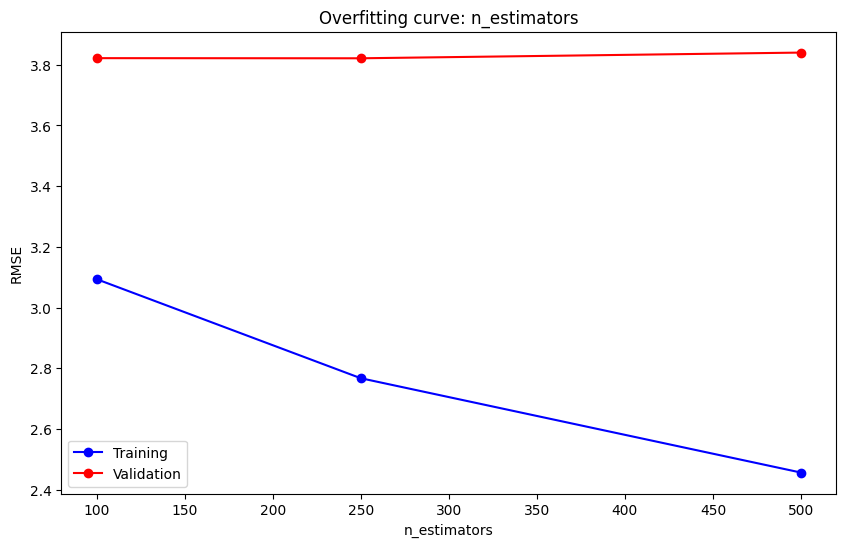

In [347]:
%%time 
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

Seems like 500 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 250 for now.

In [348]:
best_params['n_estimators'] = 250

### Max Depth

CPU times: total: 1min 9s
Wall time: 10.7 s


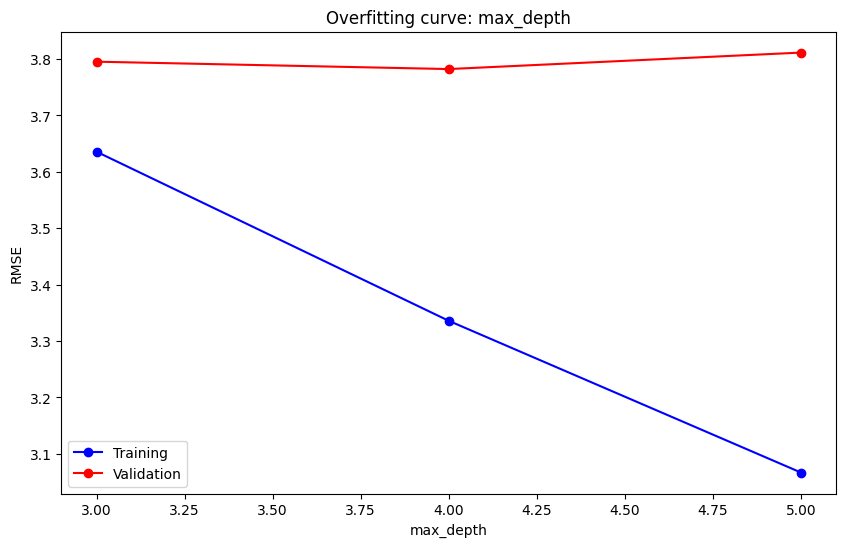

In [349]:
%%time 
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

Looks like a max depth of 5 is ideal.

In [350]:
best_params['max_depth'] = 5

### Learning Rate

CPU times: total: 1min 34s
Wall time: 13 s


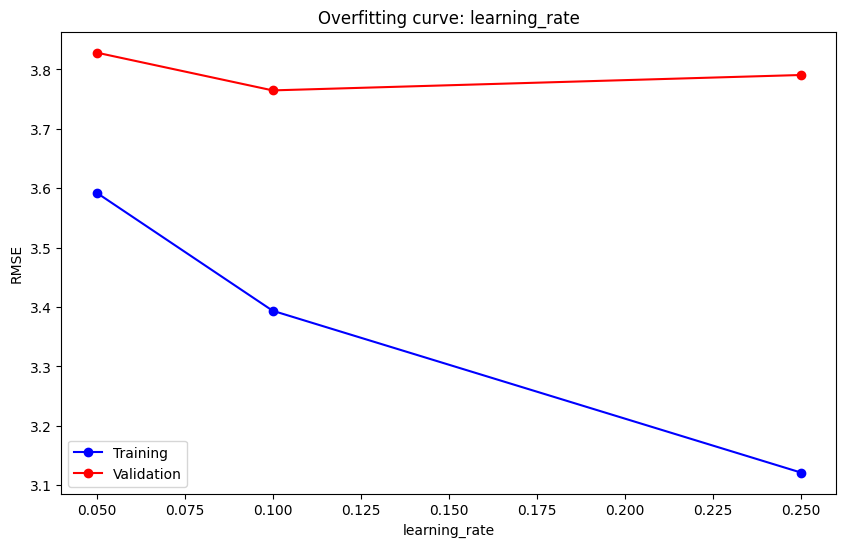

In [351]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

Seems like the best learning rate is 0.25.

In [352]:
best_params['learning_rate'] = 0.25

### Other Parameters

Similarly we can experiment with other parameters. 

Here's a set of parameters that works well:

In [353]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8)

In [354]:
%%time
xgb_model_final.fit(train_inputs, train_targets)

CPU times: total: 47.8 s
Wall time: 7.8 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [355]:
evaluate(xgb_model_final)

(3.1722608,
 3.7535353,
 array([10.8916645,  9.033604 ,  8.421809 , ..., 14.484024 ,  4.5829263,
        10.827273 ], dtype=float32),
 array([10.438049 ,  8.01119  , 11.404738 , ...,  4.628754 , 10.576502 ,
         5.9950976], dtype=float32))

In [356]:
test_inputs = test_df[input_cols]

In [358]:
test_preds = xgb_model_final.predict(test_inputs)
sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
sub_df['fare_amount'] = test_preds
sub_df.to_csv("Final_Submission.csv", index=None)

In [360]:
pd.read_csv("Final_Submission.csv")

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.723157
1,2015-01-27 13:08:24.0000003,10.904222
2,2011-10-08 11:53:44.0000002,4.874192
3,2012-12-01 21:12:12.0000002,8.830291
4,2012-12-01 21:12:12.0000003,15.890627
...,...,...
9909,2015-05-10 12:37:51.0000002,8.814969
9910,2015-01-12 17:05:51.0000001,11.712416
9911,2015-04-19 20:44:15.0000001,52.553436
9912,2015-01-31 01:05:19.0000005,19.839535
